<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_04_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%8C%80%ED%91%9C%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04. 기초통계 - 대표통계량
---
* 날짜:
* 이름:

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.randint(1, 101, 1000) # Return random integers from low (inclusive) to high (exclusive).
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

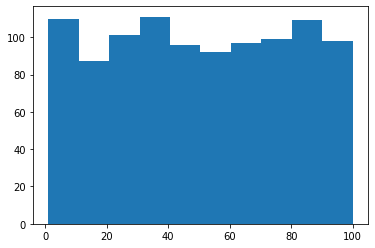

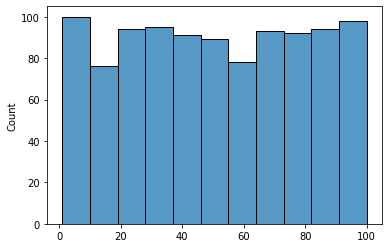

In [ ]:
plt.hist(a)
plt.show()
sns.histplot(s)
plt.show()

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [ ]:
print(np.median(a))
print(s.median())

50.0
51.0


### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [ ]:
print(np.mean(a))
print(s.mean())

50.397
50.882


### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [ ]:
def harmonic(x): # x는 ndarray
    return len(x) / sum(1/x) # np.sum 이나 sum이나 같음

* 조화 평균 계산

In [ ]:
print(harmonic(a))
print(harmonic(s))

17.083487839894236
17.083487839894236


### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [ ]:
from scipy.stats import trim_mean
print(trim_mean(a,0.1))

50.5025


## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.choice(['A', 'B', 'C'], 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

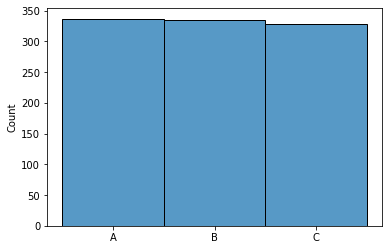

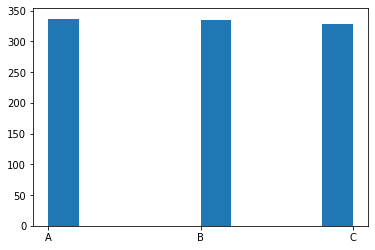

In [ ]:
sns.histplot(a)
plt.show()
plt.hist(s)
plt.show()

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [ ]:
print(s.value_counts())

A    337
B    335
C    328
dtype: int64


* 사이파이 함수 `mode` 사용하기

In [ ]:
from scipy.stats import mode
print('mode from scipy :', mode(a))

mode from scipy : ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))


## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

(array([ 3.,  1.,  6.,  9., 22., 17., 23., 13.,  4.,  2.]),
 array([ 50.26935699,  77.49856989, 104.72778278, 131.95699568,
        159.18620857, 186.41542147, 213.64463437, 240.87384726,
        268.10306016, 295.33227306, 322.56148595]),
 <a list of 10 Patch objects>)

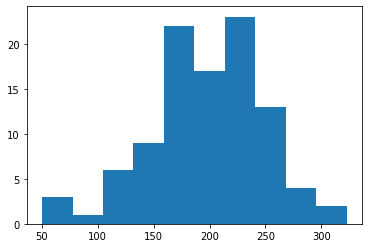

In [ ]:
a = np.random.normal(200, 50, 100)
plt.hist(a)

In [ ]:
a_new = np.append(a,100000)

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([5.02693570e+01, 1.00452424e+04, 2.00402155e+04, 3.00351885e+04,
        4.00301616e+04, 5.00251347e+04, 6.00201077e+04, 7.00150808e+04,
        8.00100539e+04, 9.00050269e+04, 1.00000000e+05]),
 <a list of 10 Patch objects>)

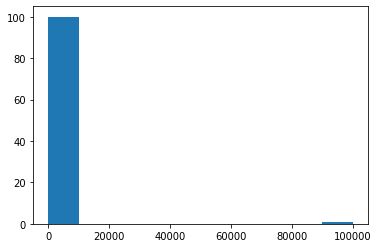

In [ ]:
plt.hist(a_new)

In [ ]:
# 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.
print('a의 산술평균 :', np.mean(a))
print('a_new의 산술평균 :', np.mean(a_new))

a의 산술평균 : 198.83283361024925
a_new의 산술평균 : 1186.9632015943062


In [ ]:
# 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.
from scipy.stats import trim_mean
print('a의 절사평균(alpha = 0.1) : ', trim_mean(a, 0.1))
print('a_new의 절사평균(alpha = 0.1) : ', trim_mean(a_new, 0.1))

a의 절사평균(alpha = 0.1) :  200.69686333007067
a_new의 절사평균(alpha = 0.1) :  201.33207340911076


#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [ ]:
tdf = pd.read_csv('/content/train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PassengerId

In [ ]:
print('중앙값 : ', tdf['PassengerId'].median())
print('최빈값 : ', mode(tdf['PassengerId']))
print('산술평균 : ', tdf['PassengerId'].mean())
print('조화평균 : ', harmonic(tdf['PassengerId']))
print('절사평균 : ', trim_mean(tdf['PassengerId'], 0.1))

중앙값 :  446.0
최빈값 :  ModeResult(mode=array([1]), count=array([1]))
산술평균 :  446.0
조화평균 :  120.89353503234959
절사평균 :  446.0


#### Survived

In [ ]:
print('중앙값 : ', tdf['Survived'].median())
print('최빈값 : ', mode(tdf['Survived']))
print('산술평균 : ', tdf['Survived'].mean())
print('조화평균 : ', harmonic(tdf['Survived']))
print('절사평균 : ', trim_mean(tdf['Survived'], 0.1))

중앙값 :  0.0
최빈값 :  ModeResult(mode=array([0]), count=array([549]))
산술평균 :  0.3838383838383838
조화평균 :  0.0
절사평균 :  0.3548387096774194


#### Pclass

In [ ]:
print('중앙값 : ', tdf['Pclass'].median())
print('최빈값 : ', mode(tdf['Pclass']))
print('산술평균 : ', tdf['Pclass'].mean())
print('조화평균 : ', harmonic(tdf['Pclass']))
print('절사평균 : ', trim_mean(tdf['Pclass'], 0.1))

중앙값 :  3.0
최빈값 :  ModeResult(mode=array([3]), count=array([491]))
산술평균 :  2.308641975308642
조화평균 :  1.8890459363957726
절사평균 :  2.3856942496493687


#### Name

In [ ]:
print('최빈값 : ', mode(tdf['Name']))

최빈값 :  ModeResult(mode=array(['Abbing, Mr. Anthony'], dtype=object), count=array([1]))


#### Sex

In [ ]:
print('최빈값 : ', mode(tdf['Sex']))

최빈값 :  ModeResult(mode=array(['male'], dtype=object), count=array([577]))


#### Age

In [ ]:
print('중앙값 : ', tdf['Age'].dropna().median())
print('최빈값 : ', mode(tdf['Age'].dropna()))
print('산술평균 : ', tdf['Age'].dropna().mean())
print('조화평균 : ', harmonic(tdf['Age'].dropna()))
print('절사평균 : ', trim_mean(tdf['Age'].dropna(), 0.1))

중앙값 :  28.0
최빈값 :  ModeResult(mode=array([24.]), count=array([30]))
산술평균 :  29.69911764705882
조화평균 :  13.408573953437948
절사평균 :  29.26923076923077


#### SibSp

In [ ]:
print('중앙값 : ', tdf['SibSp'].median())
print('최빈값 : ', mode(tdf['SibSp']))
print('산술평균 : ', tdf['SibSp'].mean())
print('조화평균 : ', harmonic(tdf['SibSp']))
print('절사평균 : ', trim_mean(tdf['SibSp'], 0.1))

중앙값 :  0.0
최빈값 :  ModeResult(mode=array([0]), count=array([608]))
산술평균 :  0.5230078563411896
조화평균 :  0.0
절사평균 :  0.2720897615708275


#### Parch

In [ ]:
print('중앙값 : ', tdf['Parch'].median())
print('최빈값 : ', mode(tdf['Parch']))
print('산술평균 : ', tdf['Parch'].mean())
print('조화평균 : ', harmonic(tdf['Parch']))
print('절사평균 : ', trim_mean(tdf['Parch'], 0.1))

중앙값 :  0.0
최빈값 :  ModeResult(mode=array([0]), count=array([678]))
산술평균 :  0.38159371492704824
조화평균 :  0.0
절사평균 :  0.182328190743338


####  Ticket 

In [ ]:
print('최빈값 : ', mode(tdf['Ticket']))

최빈값 :  ModeResult(mode=array(['1601'], dtype=object), count=array([7]))


#### Fare 

In [ ]:
print('중앙값 : ', tdf['Fare'].median())
print('최빈값 : ', mode(tdf['Fare']))
print('산술평균 : ', tdf['Fare'].mean())
print('조화평균 : ', harmonic(tdf['Fare']))
print('절사평균 : ', trim_mean(tdf['Fare'], 0.1))

중앙값 :  14.4542
최빈값 :  ModeResult(mode=array([8.05]), count=array([43]))
산술평균 :  32.2042079685746
조화평균 :  0.0
절사평균 :  21.37871556802244


#### Cabin 

In [ ]:
print('최빈값 : ', mode(tdf['Cabin'].dropna()))

최빈값 :  ModeResult(mode=array(['B96 B98'], dtype=object), count=array([4]))


#### Embarked

In [ ]:
print('최빈값 : ', mode(tdf['Embarked'].dropna()))

최빈값 :  ModeResult(mode=array(['S'], dtype=object), count=array([644]))
